In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv("train.csv")
display(titanic.head(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Label Encoding

Sex değişkenini Mean encoding yaparak encode ediniz. Her kategori için Survived değişkeninin ortalamasını kategori adı ile değiştirebilirsiniz. 

IPUCU: pandas groupby ve map fonksiyonlarını kullanabilirsiniz.

In [22]:
#python kodu buraya
from sklearn.preprocessing import LabelEncoder
df_new=titanic.copy()
df_new["Sex_enc"]= df_new.Survived.groupby(df_new.Sex).mean()
df_new

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_enc
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,NaN
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,NaN


Bindikleri Yer (Embarked) değişkenini sklearn OneHotEncoder objesini kullanarak encode edin.<br>

In [24]:
#python kodu buraya
from sklearn.preprocessing import OneHotEncoder
df_new.Embarked.fillna(df_new["Embarked"].mode()[0], inplace=True)
ohe=OneHotEncoder()
df_enc=ohe.fit_transform(df_new[["Embarked"]])


<891x3 sparse matrix of type '<class 'numpy.float64'>'
	with 891 stored elements in Compressed Sparse Row format>

Cabin değişkenini sklearn LabelEncoder veya OrdinalEncoder objesini kullanarak encode edin.

In [27]:
#python kodu buraya
from sklearn.preprocessing import LabelEncoder
df_cabin=titanic.copy()
lenc=LabelEncoder()
df_cabin.Cabin= df_cabin.Cabin.astype(str)
df_cabin["Cabin_enc"]=lenc.fit_transform(df_cabin.Cabin)
display(df_cabin)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_enc
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,nan,S,147
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,81
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,nan,S,147
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,55
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,nan,S,147
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,nan,S,147
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,30
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,nan,S,147
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,60


# Outlier Handling

Fare değişkeni için boxplot çizdiriniz.

{'whiskers': [<matplotlib.lines.Line2D at 0x5785790>,
 'caps': [<matplotlib.lines.Line2D at 0x5785af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x57855c8>],
 'medians': [<matplotlib.lines.Line2D at 0x5785e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x57a0028>],
 'means': []}

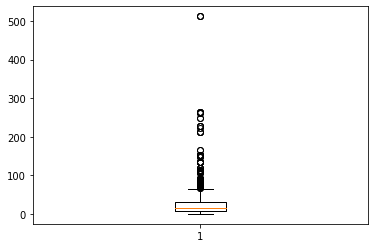

In [28]:
#python kodu buraya
import matplotlib.pyplot as plt
plt.boxplot(titanic.Fare)

Fare değişkeninedeki outlier değerleri Z-Score kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız. 

In [32]:
from scipy.stats import zscore
z_score=zscore(titanic["Fare"])
print((z_score>3).sum(), (z_score<-3).sum())
upper=df_new[z_score<=3]['Fare'].max()
lower=df_new[z_score>=-3]['Fare'].min()
print(upper, lower)

20 0
164.8667 0.0


Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [34]:
upper_replace = titanic[z_score<=3].Fare.max()
lower_replace = titanic[z_score>=-3].Fare.min()

titanic.Fare[z_score>3] = upper_replace
titanic.Fare[z_score<-3] = lower_replace
display(titanic.Fare)

<ipython-input-34-809557a2b3e0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic.Fare[z_score>3] = upper_replace
<ipython-input-34-809557a2b3e0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic.Fare[z_score<-3] = lower_replace


0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

Fare değişkeninedeki outlier değerleri IQR metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [35]:
q1 = titanic["Fare"].quantile(q=0.25)
q3 = titanic["Fare"].quantile(q=0.75)
IQR=q3-q1
print(IQR)

23.0896


Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [10]:
#python kodu buraya

Fare değişkeninedeki outlier değerleri Hard-Edges metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [11]:
#python kodu buraya

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [12]:
#python kodu buraya

Fare değişkeni için yukarıdaki 3 metodu kullanarak sınır değerler olarak bulduğunuz değerleri ve outlier sayılarını karşılaştırın. Bu değişken için hangisini kullanmak daha mantıklı olabilir?